<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/New_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 10.5MB/s 
     |████████████████████████████████| 266kB 33.7MB/s 
     |████████████████████████████████| 153kB 38.7MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=cd8e856e4dae8057d9e9597ab3f7b2d257120b3ea34a18c3ef8281a49c184b69
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=85010f96cf7ea159ff43a7b424339fda95c15e597cbb9e1f610dbde97de74bc6
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
plt.style.use('fivethirtyeight') 
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [ ]:
api_key = 'TH6MZ4PJ9YRP8HNX'

In [ ]:
cc = ForeignExchange(key = api_key, output_format = 'pandas')
df, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='5min',outputsize='full')
print(df)

                     1. open  2. high  3. low  4. close
date                                                   
2020-09-04 10:10:00   1.1856   1.1858  1.1853    1.1858
2020-09-04 10:05:00   1.1850   1.1857  1.1848    1.1856
2020-09-04 10:00:00   1.1853   1.1854  1.1845    1.1851
2020-09-04 09:55:00   1.1846   1.1853  1.1845    1.1851
2020-09-04 09:50:00   1.1852   1.1853  1.1846    1.1846
...                      ...      ...     ...       ...
2020-08-31 23:15:00   1.1936   1.1938  1.1934    1.1937
2020-08-31 23:10:00   1.1937   1.1938  1.1934    1.1936
2020-08-31 23:05:00   1.1938   1.1938  1.1934    1.1937
2020-08-31 23:00:00   1.1937   1.1939  1.1935    1.1937
2020-08-31 22:55:00   1.1938   1.1938  1.1935    1.1937

[1000 rows x 4 columns]


In [ ]:
df = df[::-1]
df

,1. open,2. high,3. low,4. close
date,,,,
2020-08-31 22:55:00,1.1938,1.1938,1.1935,1.1937
2020-08-31 23:00:00,1.1937,1.1939,1.1935,1.1937
2020-08-31 23:05:00,1.1938,1.1938,1.1934,1.1937
2020-08-31 23:10:00,1.1937,1.1938,1.1934,1.1936
2020-08-31 23:15:00,1.1936,1.1938,1.1934,1.1937
...,...,...,...,...
2020-09-04 09:50:00,1.1852,1.1853,1.1846,1.1846
2020-09-04 09:55:00,1.1846,1.1853,1.1845,1.1851
2020-09-04 10:00:00,1.1853,1.1854,1.1845,1.1851


In [ ]:
df['4. close'][89]

1.1983

In [ ]:
df['test'] = -1
for x in range(df['4. close'].shape[0]-1):
  if df['4. close'][x]<df['4. close'][x+1]:
    df['test'][x] = 1
  elif df['4. close'][x]>df['4. close'][x+1]:
    df['test'][x] = 0
  else:
    df['test'][x] = -1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(1000, 5)

In [ ]:
df.tail(10)

,1. open,2. high,3. low,4. close,test
date,,,,,
2020-09-04 09:25:00,1.1855,1.1855,1.1849,1.1853,0
2020-09-04 09:30:00,1.1853,1.1854,1.1847,1.1850,0
2020-09-04 09:35:00,1.1850,1.1850,1.1844,1.1847,-1
2020-09-04 09:40:00,1.1847,1.1847,1.1843,1.1847,1
2020-09-04 09:45:00,1.1847,1.1853,1.1845,1.1853,0
2020-09-04 09:50:00,1.1852,1.1853,1.1846,1.1846,1
2020-09-04 09:55:00,1.1846,1.1853,1.1845,1.1851,-1
2020-09-04 10:00:00,1.1853,1.1854,1.1845,1.1851,1
2020-09-04 10:05:00,1.1850,1.1857,1.1848,1.1856,1


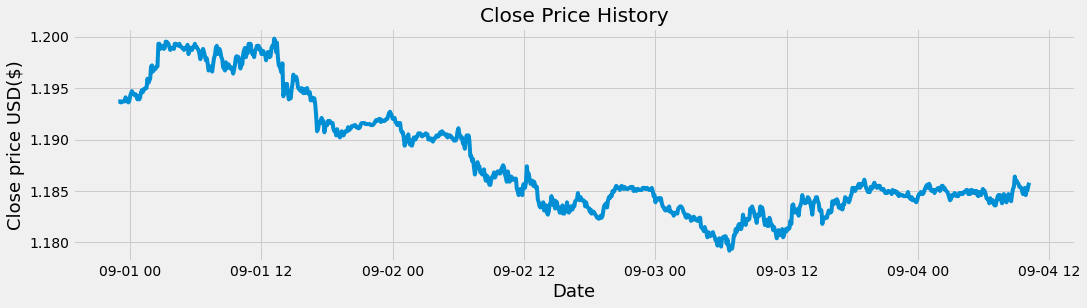

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['4. close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['4. close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.99)

training_data_len

990

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.7038835 ],
       [0.7038835 ],
       [0.7038835 ],
       [0.69902913],
       [0.7038835 ],
       [0.7038835 ],
       [0.7038835 ],
       [0.7038835 ],
       [0.72330097],
       [0.71359223],
       [0.70873786],
       [0.69902913],
       [0.7038835 ],
       [0.72815534],
       [0.74271845],
       [0.75242718],
       [0.74271845],
       [0.73786408],
       [0.73300971],
       [0.73786408],
       [0.72815534],
       [0.71359223],
       [0.72815534],
       [0.71359223],
       [0.72330097],
       [0.74757282],
       [0.75728155],
       [0.74757282],
       [0.76213592],
       [0.76213592],
       [0.76699029],
       [0.76699029],
       [0.81067961],
       [0.79126214],
       [0.80097087],
       [0.81067961],
       [0.86893204],
       [0.87378641],
       [0.84466019],
       [0.8592233 ],
       [0.85436893],
       [0.8592233 ],
       [0.86893204],
       [0.86893204],
       [0.97572816],
       [0.97572816],
       [0.95145631],
       [0.966

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.7038835 , 0.7038835 , 0.7038835 , 0.69902913, 0.7038835 ,
       0.7038835 , 0.7038835 , 0.7038835 , 0.72330097, 0.71359223,
       0.70873786, 0.69902913, 0.7038835 , 0.72815534, 0.74271845,
       0.75242718, 0.74271845, 0.73786408, 0.73300971, 0.73786408,
       0.72815534, 0.71359223, 0.72815534, 0.71359223, 0.72330097,
       0.74757282, 0.75728155, 0.74757282, 0.76213592, 0.76213592,
       0.76699029, 0.76699029, 0.81067961, 0.79126214, 0.80097087,
       0.81067961, 0.86893204, 0.87378641, 0.84466019, 0.8592233 ,
       0.85436893, 0.8592233 , 0.86893204, 0.86893204, 0.97572816,
       0.97572816, 0.95145631, 0.96601942, 0.96601942, 0.95631068,
       0.95145631, 0.95631068, 0.98543689, 0.98543689, 0.98058252,
       0.97572816, 0.96116505, 0.94660194, 0.95631068, 0.95631068])]
[0.9563106796116543]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(930, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,y_train,batch_size=1, epochs = 1)

930/930 [==============================] - 23s 25ms/step - loss: 0.0035


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

1.4756565093954066e-05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


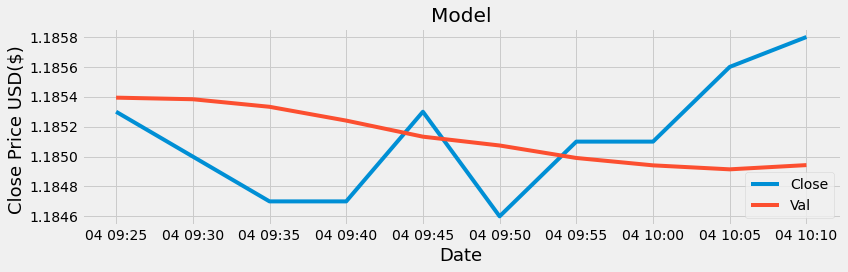

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['4. close'])
plt.plot(valid[['4. close', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
valid.tail(60)

,4. close,Predictions
date,,
2020-09-04 09:25:00,1.1853,1.185394
2020-09-04 09:30:00,1.1850,1.185384
2020-09-04 09:35:00,1.1847,1.185333
2020-09-04 09:40:00,1.1847,1.185241
2020-09-04 09:45:00,1.1853,1.185133
2020-09-04 09:50:00,1.1846,1.185074
2020-09-04 09:55:00,1.1851,1.184991
2020-09-04 10:00:00,1.1851,1.184941
2020-09-04 10:05:00,1.1856,1.184914


In [ ]:
# Get the quote
# apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='5min',outputsize='full')
apple_quote = apple_quote[::-1]
# Create new dataframe
new_df = apple_quote.filter(items=['4. close'])
# Get the last 60 days closing price and convert to numpy array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get Predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
print(new_df['4. close'][-1])
if pred_price > new_df['4. close'][-1]:
  print("BUY")
elif pred_price < new_df['4. close'][-1]:
  print("Sell")
else:
  print ("Dont buy or sell")

[[1.1850199]]
1.1849
BUY


In [ ]:
new, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='5min',outputsize='full')
new = new[::-1]
print(new['4. close'].tail(10))

date
2020-09-04 09:25:00    1.1853
2020-09-04 09:30:00    1.1850
2020-09-04 09:35:00    1.1847
2020-09-04 09:40:00    1.1847
2020-09-04 09:45:00    1.1853
2020-09-04 09:50:00    1.1846
2020-09-04 09:55:00    1.1851
2020-09-04 10:00:00    1.1851
2020-09-04 10:05:00    1.1856
2020-09-04 10:10:00    1.1858
Name: 4. close, dtype: float64
